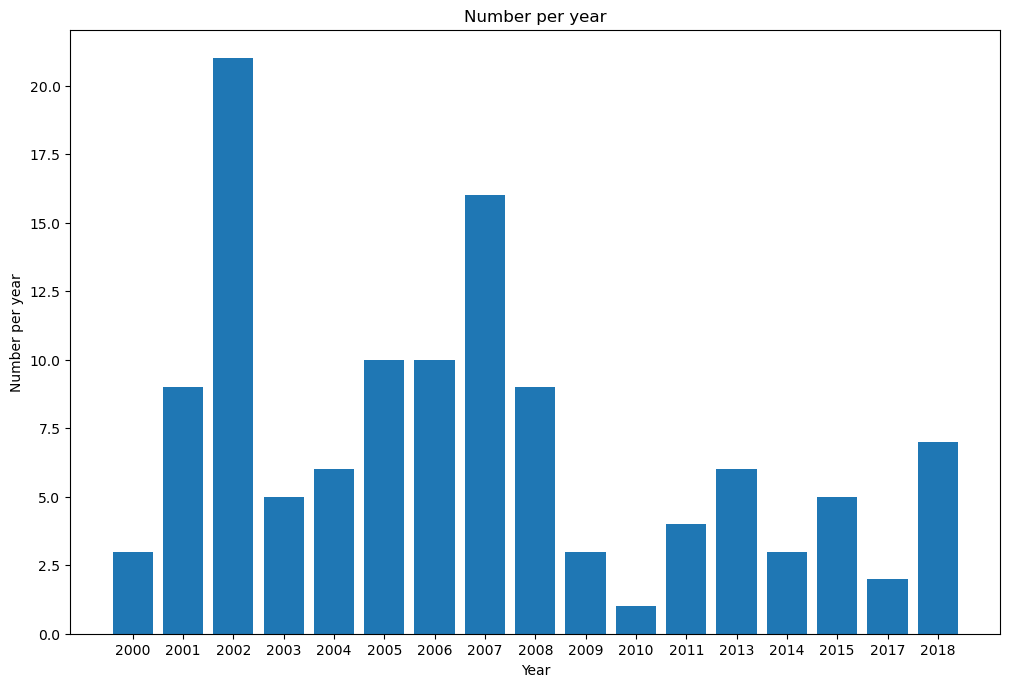

<Figure size 432x288 with 0 Axes>

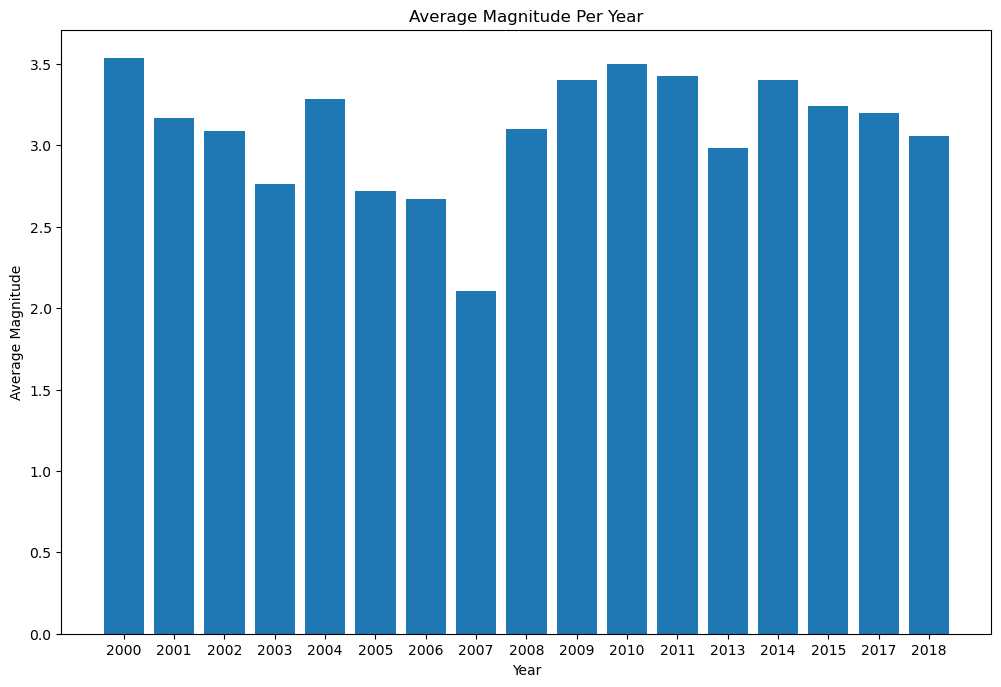

In [31]:
from datetime import date

import matplotlib.pyplot as plt


import json
# The Python standard library includes some functionality for communicating
# over the Internet.
# However, we will use a more powerful and simpler library called requests.
# This is external library that you may need to install first.
import requests
import numpy as np

def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )


    # The response we get back is an object with several fields.
    # The actual contents we care about are in its text field:
    text = response.text
    # To understand the structure of this text, you may want to save it
    # to a file and open it in VS Code or a browser.
    # See the README file for more information.

    # We need to interpret the text to get values that we can work with.
    # What format is the text in? How can we load the values?
    return json.loads(text)


def get_year(earthquake):
    """Extract the year in which an earthquake happened."""
    timestamp = earthquake['properties']['time']
    # The time is given in a strange-looking but commonly-used format.
    # To understand it, we can look at the documentation of the source data:
    # https://earthquake.usgs.gov/data/comcat/index.php#time
    # Fortunately, Python provides a way of interpreting this timestamp:
    # (Question for discussion: Why do we divide by 1000?)
    year = date.fromtimestamp(timestamp/1000).year
    return year


def get_magnitude(earthquake):
    mag=earthquake['properties']['mag']
    return mag
    


# This is function you may want to create to break down the computations,
# although it is not necessary. You may also change it to something different.
def get_magnitudes_per_year(earthquakes):
    earthquake_dict={}
    for earthquake in earthquakes:
        earthquake_dict.setdefault(get_year(earthquake),[]).append(get_magnitude(earthquake))   
    return earthquake_dict

from statistics import mean

def plot_average_magnitude_per_year(earthquakes):
    Year=[]
    Avg_Mag=[]
    ed=get_magnitudes_per_year(earthquakes)
    for y,m in ed.items():
        #ed[y]=mean(m)
        Year.append(str(y))
        Avg_Mag.append(mean(m))
    plt.figure(figsize=(12,8),dpi=100)
    plt.bar(Year,Avg_Mag)
    plt.title('Average Magnitude Per Year')
    plt.xlabel('Year')
    plt.ylabel('Average Magnitude')
    return plt.show()


def plot_number_per_year(earthquakes):
    Number=[]
    Year=[]
    ed=get_magnitudes_per_year(earthquakes)
    for y,m in ed.items():
        #ed[y]=mean(m)
        Year.append(str(y))
        Number.append(len(m)) 
    plt.figure(figsize=(12,8),dpi=100)
    plt.bar(Year,Number)
    plt.title('Number per year')
    plt.xlabel('Year')
    plt.ylabel('Number per year')
    return plt.show() 



# Get the data we will work with
quakes = get_data()['features']

# Plot the results - this is not perfect since the x axis is shown as real
# numbers rather than integers, which is what we would prefer!
plot_number_per_year(quakes)
plt.clf()  # This clears the figure, so that we don't overlay the two plots
plot_average_magnitude_per_year(quakes)

In [22]:

get_magnitudes_per_year(quakes)

{2000: [2.6, 4, 4],
 2001: [3.3, 2.9, 2.9, 4, 2.6, 2.6, 3.5, 2.5, 4.2],
 2002: [3,
  3.4,
  3.5,
  3.4,
  3,
  2.3,
  2.1,
  4.8,
  3.2,
  1.2,
  3.7,
  4.3,
  2.9,
  3.5,
  3.3,
  3.8,
  2.8,
  2.5,
  2.5,
  2.6,
  3.1],
 2003: [2.3, 3, 2.8, 2.5, 3.2],
 2004: [3.3, 3.6, 3.7, 3.4, 2.7, 3],
 2005: [3.8, 2.6, 2.9, 3, 2.4, 3.2, 2.7, 2.4, 1.7, 2.5],
 2006: [2.6, 1.9, 2.9, 2.5, 2.7, 1.4, 2.7, 2.8, 3.6, 3.6],
 2007: [1.3,
  1.7,
  1.4,
  1.7,
  1.2,
  1.6,
  1.3,
  1.4,
  4.6,
  2.6,
  2.5,
  2.2,
  2.3,
  2.3,
  3.3,
  2.3],
 2008: [3.1, 4.8, 2.8, 3.1, 2.5, 1.5, 3.5, 3.9, 2.7],
 2009: [3.5, 3, 3.7],
 2010: [3.5],
 2011: [3.6, 3.5, 2.7, 3.9],
 2013: [2.9, 2.3, 2.9, 3.8, 2.8, 3.2],
 2014: [4.1, 3.5, 2.6],
 2015: [2.9, 3.8, 3.7, 3, 2.8],
 2017: [3.8, 2.6],
 2018: [4.3, 2.7, 4.1, 2.6, 2.4, 2.8, 2.5]}